Saving testdata - Rikuto S.txt to testdata - Rikuto S (4).txt


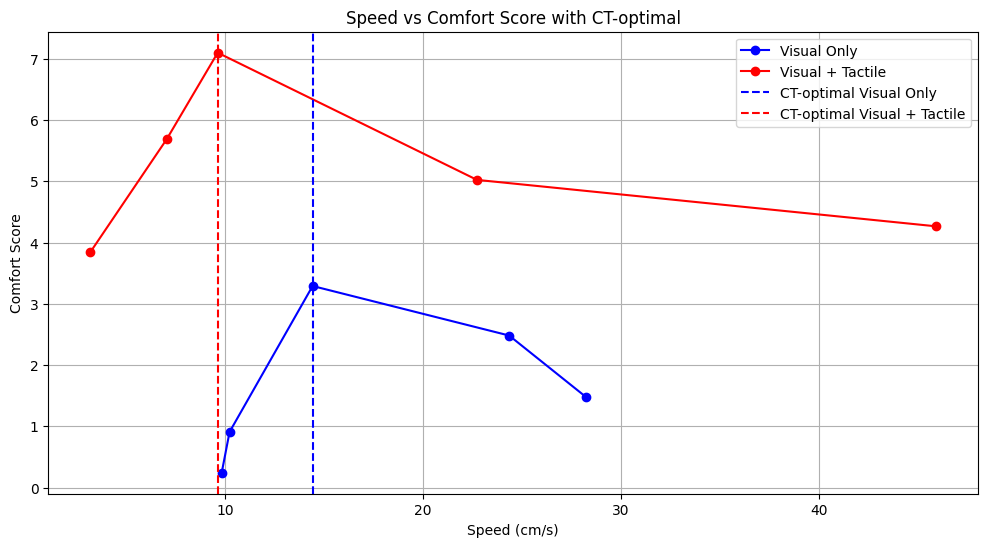

In [ ]:
import re
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
with open(file_name, 'r', encoding='utf-8') as file:
    data = file.read()

pattern_data = r"([\d.]+)\((P[12])\) : ([\d.]+)"
matches = re.findall(pattern_data, data)

pattern_ct_optimal = r"CT-optimal\(P([12])\) : ([\d.]+)"
ct_optimal_matches = re.findall(pattern_ct_optimal, data)
ct_optimal = {f"P{pn}": float(vn) for pn, vn in ct_optimal_matches}
data_p1 = []
data_p2 = []

for speed, pattern, comfort in matches:
    speed = float(speed)
    comfort = float(comfort)
    if pattern == "P1":
        data_p1.append((speed, comfort))
    elif pattern == "P2":
        data_p2.append((speed, comfort))

data_p1 = sorted(data_p1, key=lambda x: x[0])
data_p2 = sorted(data_p2, key=lambda x: x[0])

speed_p1, comfort_p1 = zip(*data_p1) if data_p1 else ([], [])
speed_p2, comfort_p2 = zip(*data_p2) if data_p2 else ([], [])

plt.figure(figsize=(12, 6))
plt.plot(speed_p1, comfort_p1, 'o-', label="Visual Only", color='blue')
plt.plot(speed_p2, comfort_p2, 'o-', label="Visual + Tactile", color='red')

if "P1" in ct_optimal:
    plt.axvline(ct_optimal["P1"], color='blue', linestyle='--', label="CT-optimal Visual Only")
if "P2" in ct_optimal:
    plt.axvline(ct_optimal["P2"], color='red', linestyle='--', label="CT-optimal Visual + Tactile")

plt.xlabel("Speed (cm/s)")
plt.ylabel("Comfort Score")
plt.legend()
plt.grid(True)
plt.show()